In [3]:
import pandas as pd
import ast

# Load the CSV file
df = pd.read_csv("/content/drive/MyDrive/CSE477/cleaned_comments.csv")

# Ensure 'cleaned_tokens' column is correctly formatted as lists
df['cleaned_tokens'] = df['cleaned_tokens'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Split into 5 roughly equal chunks
chunks = []
chunk_size = len(df) // 5
for i in range(5):
    start = i * chunk_size
    end = (i + 1) * chunk_size if i < 4 else len(df)
    chunks.append(df.iloc[start:end])

# Example: Check first chunk
print(chunks[0].head())


                 username        timestamp_text  \
0    @risebyliftingothers  2 years ago (edited)   
1  @auliamardhatillah2240           2 years ago   
2             @limwei2634           2 years ago   
3         @nancykataria08          2 months ago   
4                @jpbaugh           2 years ago   

                                        comment_text  \
0  ₹100.00 Thanks for an amazingly simplified app...   
1  Yesterday I click on a video called 'learning ...   
2  I've been trying to learn ML for quite awhile ...   
3  No fancy words, just simple English and the ri...   
4  For anyone getting an error related to convert...   

                                      cleaned_tokens  
0   [thanks, amazingly, simplified, approach, reply]  
1  [yesterday, click, video, called, learning, ph...  
2  [ive, trying, learn, quite, awhile, could, nev...  
3  [fancy, word, simple, english, right, pace, ex...  
4  [anyone, getting, error, related, converting, ...  


In [4]:
from collections import Counter
from itertools import combinations

# Function to get unigram and bigram frequencies for a DataFrame
def get_frequent_terms(df):
    # Flatten all tokens for unigrams
    unigram_counts = Counter(token for tokens in df['cleaned_tokens'] for token in tokens)

    # For bigrams, we treat them as unordered pairs of words in the same comment
    bigram_counts = Counter(
        tuple(sorted(pair))  # sorting ensures ('word1','word2') == ('word2','word1')
        for tokens in df['cleaned_tokens']
        for pair in combinations(set(tokens), 2)
    )

    return unigram_counts, bigram_counts

# Process each chunk
for i, chunk in enumerate(chunks, start=1):
    unigrams, bigrams = get_frequent_terms(chunk)

    print(f"\n=== Chunk {i} ===")
    print("Top 10 Unigrams:")
    for word, count in unigrams.most_common(10):
        print(f"{word}: {count}")

    print("\nTop 10 Bigrams:")
    for pair, count in bigrams.most_common(10):
        print(f"{pair}: {count}")



=== Chunk 1 ===
Top 10 Unigrams:
reply: 20
video: 15
tutorial: 15
learning: 14
thank: 14
day: 12
machine: 10
course: 9
great: 8
learn: 7

Top 10 Bigrams:
('learning', 'machine'): 8
('learning', 'video'): 5
('kylie', 'reply'): 5
('course', 'reply'): 5
('day', 'reply'): 5
('learning', 'thank'): 5
('understand', 'video'): 4
('grasp', 'reply'): 4
('classification', 'reply'): 4
('quite', 'reply'): 4

=== Chunk 2 ===
Top 10 Unigrams:
learning: 22
video: 15
machine: 15
kylie: 11
reply: 11
course: 11
data: 11
model: 11
regression: 11
neural: 9

Top 10 Bigrams:
('learning', 'machine'): 9
('learn', 'learning'): 5
('like', 'video'): 4
('kylie', 'much'): 4
('much', 'thank'): 4
('concept', 'way'): 4
('concept', 'learning'): 4
('learning', 'thank'): 4
('best', 'kylie'): 4
('learning', 'reply'): 4

=== Chunk 3 ===
Top 10 Unigrams:
reply: 11
thank: 11
course: 11
really: 9
video: 9
learning: 8
much: 8
kylie: 7
implementation: 7
machine: 6

Top 10 Bigrams:
('like', 'video'): 5
('course', 'thank'): 5
('

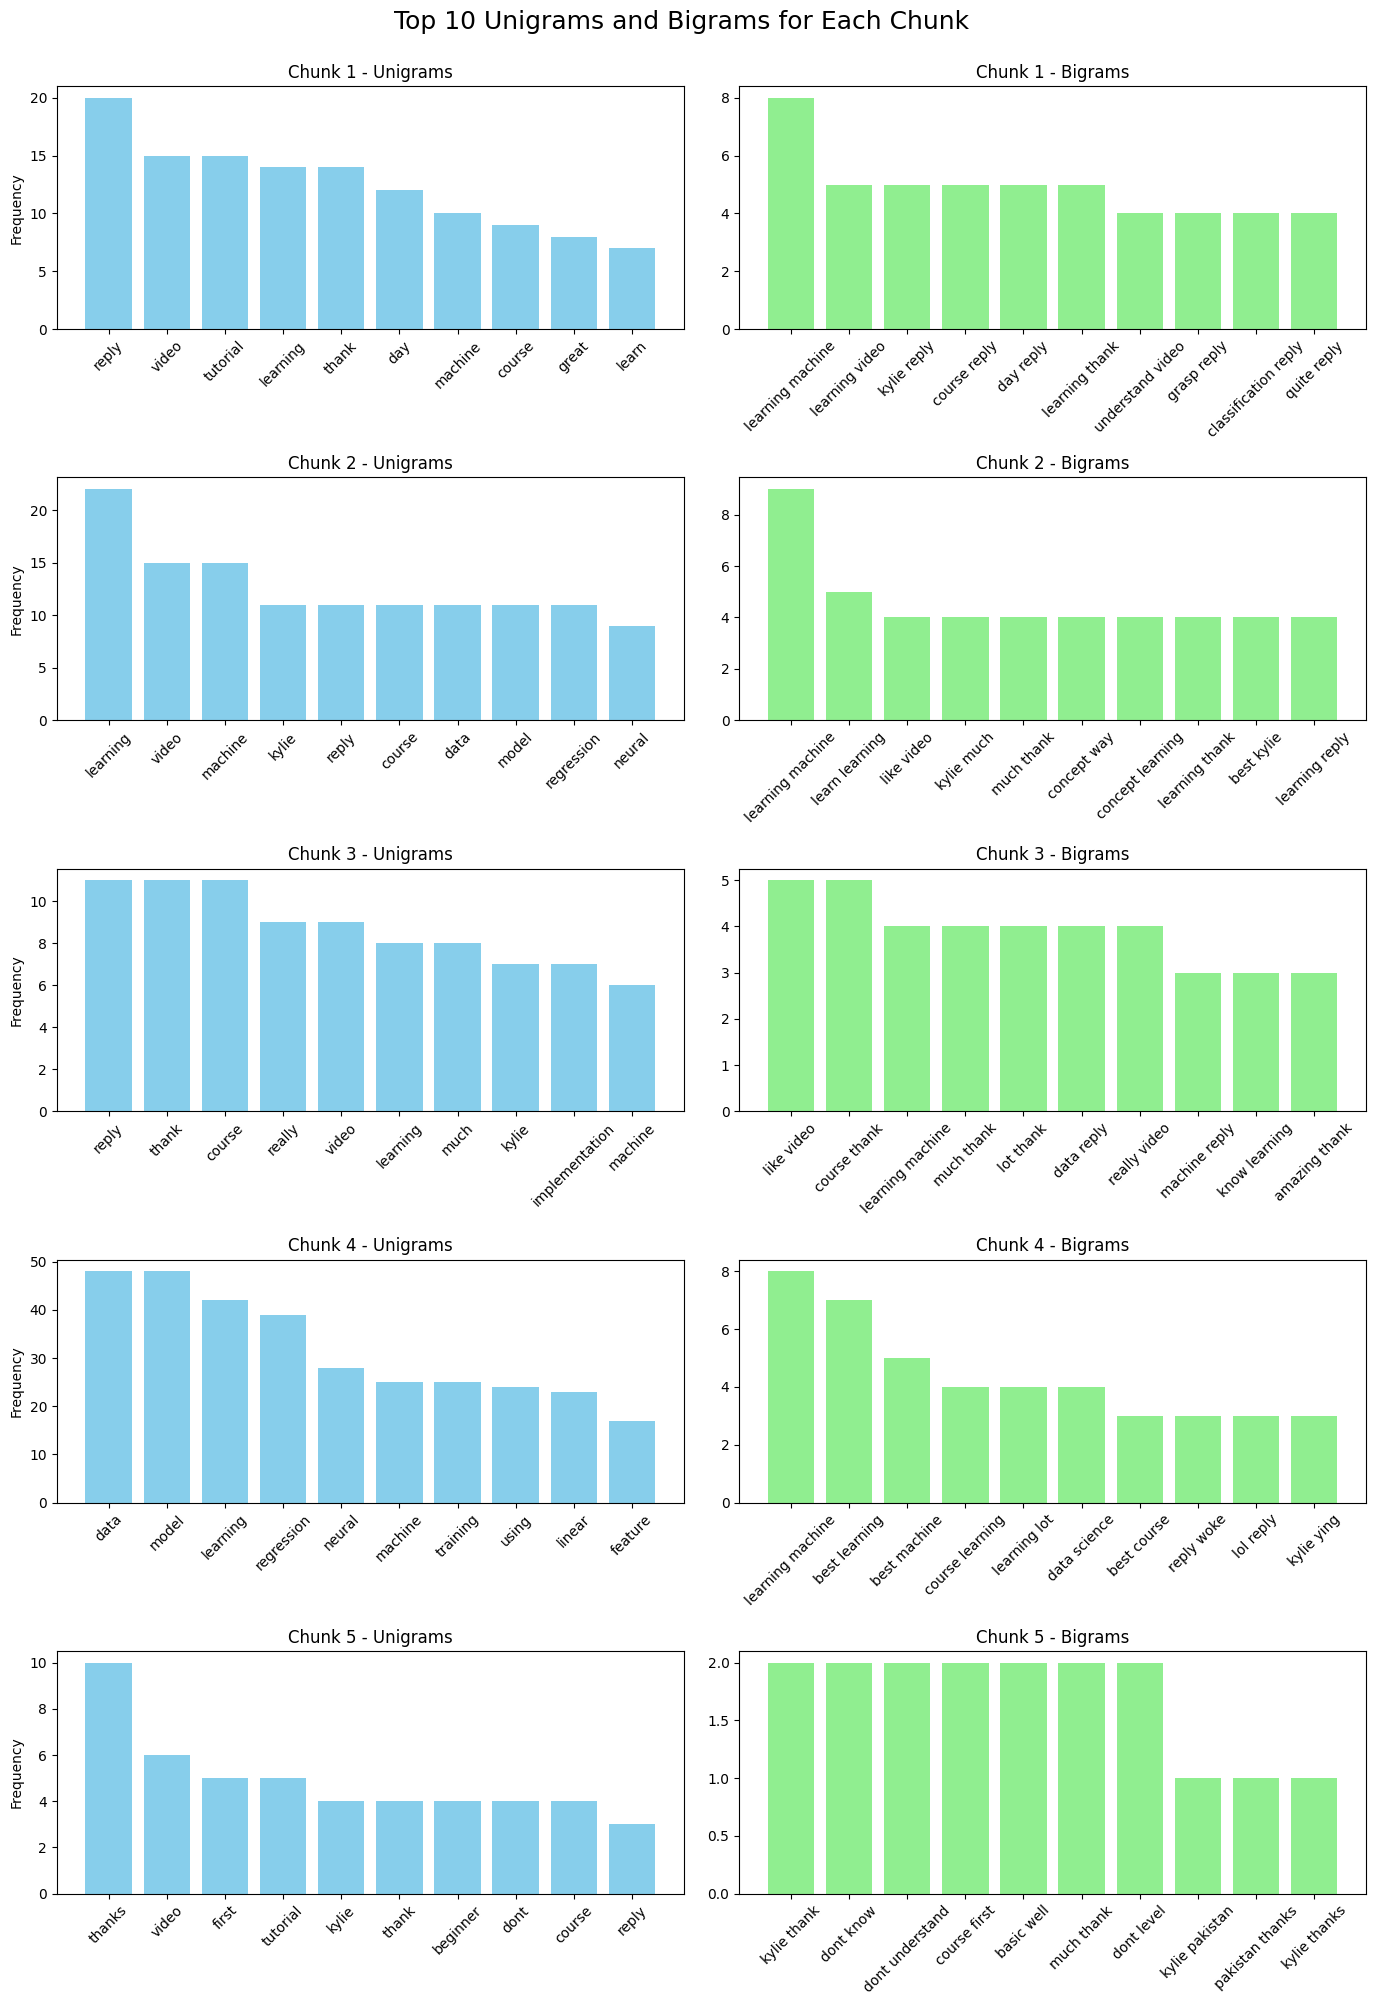

In [8]:
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

# Function to get unigram and bigram frequencies
def get_frequent_terms(df):
    unigram_counts = Counter(token for tokens in df['cleaned_tokens'] for token in tokens)
    bigram_counts = Counter(
        tuple(sorted(pair))
        for tokens in df['cleaned_tokens']
        for pair in combinations(set(tokens), 2)
    )
    return unigram_counts, bigram_counts

# Create subplots for all chunks
fig, axes = plt.subplots(5, 2, figsize=(14, 20))
fig.suptitle("Top 10 Unigrams and Bigrams for Each Chunk", fontsize=18, y=1)

for i, chunk in enumerate(chunks, start=1):
    unigrams, bigrams = get_frequent_terms(chunk)

    # Top 10
    top_uni = unigrams.most_common(10)
    top_bi = bigrams.most_common(10)

    # Unigrams bar plot
    axes[i-1, 0].bar([u[0] for u in top_uni], [u[1] for u in top_uni], color="skyblue")
    axes[i-1, 0].set_title(f"Chunk {i} - Unigrams")
    axes[i-1, 0].set_ylabel("Frequency")
    axes[i-1, 0].tick_params(axis='x', rotation=45)

    # Bigrams bar plot
    axes[i-1, 1].bar([' '.join(b[0]) for b in top_bi], [b[1] for b in top_bi], color="lightgreen")
    axes[i-1, 1].set_title(f"Chunk {i} - Bigrams")
    axes[i-1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
from collections import Counter
from itertools import combinations

# Function to get unigram and bigram counts for a DataFrame
def get_frequent_terms(df):
    unigram_counts = Counter(token for tokens in df['cleaned_tokens'] for token in tokens)
    bigram_counts = Counter(
        tuple(sorted(pair))
        for tokens in df['cleaned_tokens']
        for pair in combinations(set(tokens), 2)
    )
    return unigram_counts, bigram_counts

# Store counts for each chunk
chunk_counts = []
all_patterns = set()

for chunk in chunks:
    unigrams, bigrams = get_frequent_terms(chunk)

    # Get top 10 from each
    top_uni = [u[0] for u in unigrams.most_common(10)]
    top_bi = [' '.join(b[0]) for b in bigrams.most_common(10)]

    # Combine into one pattern list
    patterns = top_uni + top_bi
    all_patterns.update(patterns)

    # Store raw counts for all patterns
    pattern_counts = {}
    for p in patterns:
        if " " in p:  # bigram
            pair = tuple(sorted(p.split()))
            pattern_counts[p] = bigrams.get(pair, 0)
        else:  # unigram
            pattern_counts[p] = unigrams.get(p, 0)

    chunk_counts.append(pattern_counts)

# Build table with 0 fill
df_patterns = pd.DataFrame(chunk_counts)
df_patterns = df_patterns.fillna(0).astype(int)
df_patterns.index = [f"Chunk {i+1}" for i in range(len(chunks))]

# Ensure all interesting patterns are in columns
df_patterns = df_patterns.reindex(columns=sorted(all_patterns), fill_value=0)

print(df_patterns)


         amazing thank  basic well  beginner  best course  best kylie  \
Chunk 1              0           0         0            0           0   
Chunk 2              0           0         0            0           4   
Chunk 3              3           0         0            0           0   
Chunk 4              0           0         0            3           0   
Chunk 5              0           2         4            0           0   

         best learning  best machine  classification reply  concept learning  \
Chunk 1              0             0                     4                 0   
Chunk 2              0             0                     0                 4   
Chunk 3              0             0                     0                 0   
Chunk 4              7             5                     0                 0   
Chunk 5              0             0                     0                 0   

         concept way  ...  regression  reply  reply woke  thank  thanks  \
Chunk

In [11]:
# Function to find patterns with interesting movement
def select_interesting_patterns(df):
    interesting = []
    for pattern in df.columns:
        series = df[pattern]

        # Criteria for "interesting":
        # 1. Appears in some chunks but not all
        # 2. Has variation (not constant frequency)
        # 3. Has at least one significant jump (>= max/2)
        if (series.max() != series.min()) and (0 in series.values) and (series.max() >= 2):
            interesting.append(pattern)

    # Limit to top 5 by total frequency
    interesting = sorted(interesting, key=lambda p: df[p].sum(), reverse=True)[:5]
    return interesting

# Select patterns
selected_patterns = select_interesting_patterns(df_patterns)

# Build new DataFrame for correlation analysis
df_selected = df_patterns[selected_patterns]

print("Selected Patterns for Correlation Analysis:")
print(df_selected)


Selected Patterns for Correlation Analysis:
         learning  data  model  machine  regression
Chunk 1        14     0      0       10           0
Chunk 2        22    11     11       15          11
Chunk 3         8     0      0        6           0
Chunk 4        42    48     48       25          39
Chunk 5         0     0      0        0           0


/tmp/ipython-input-1640148887.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


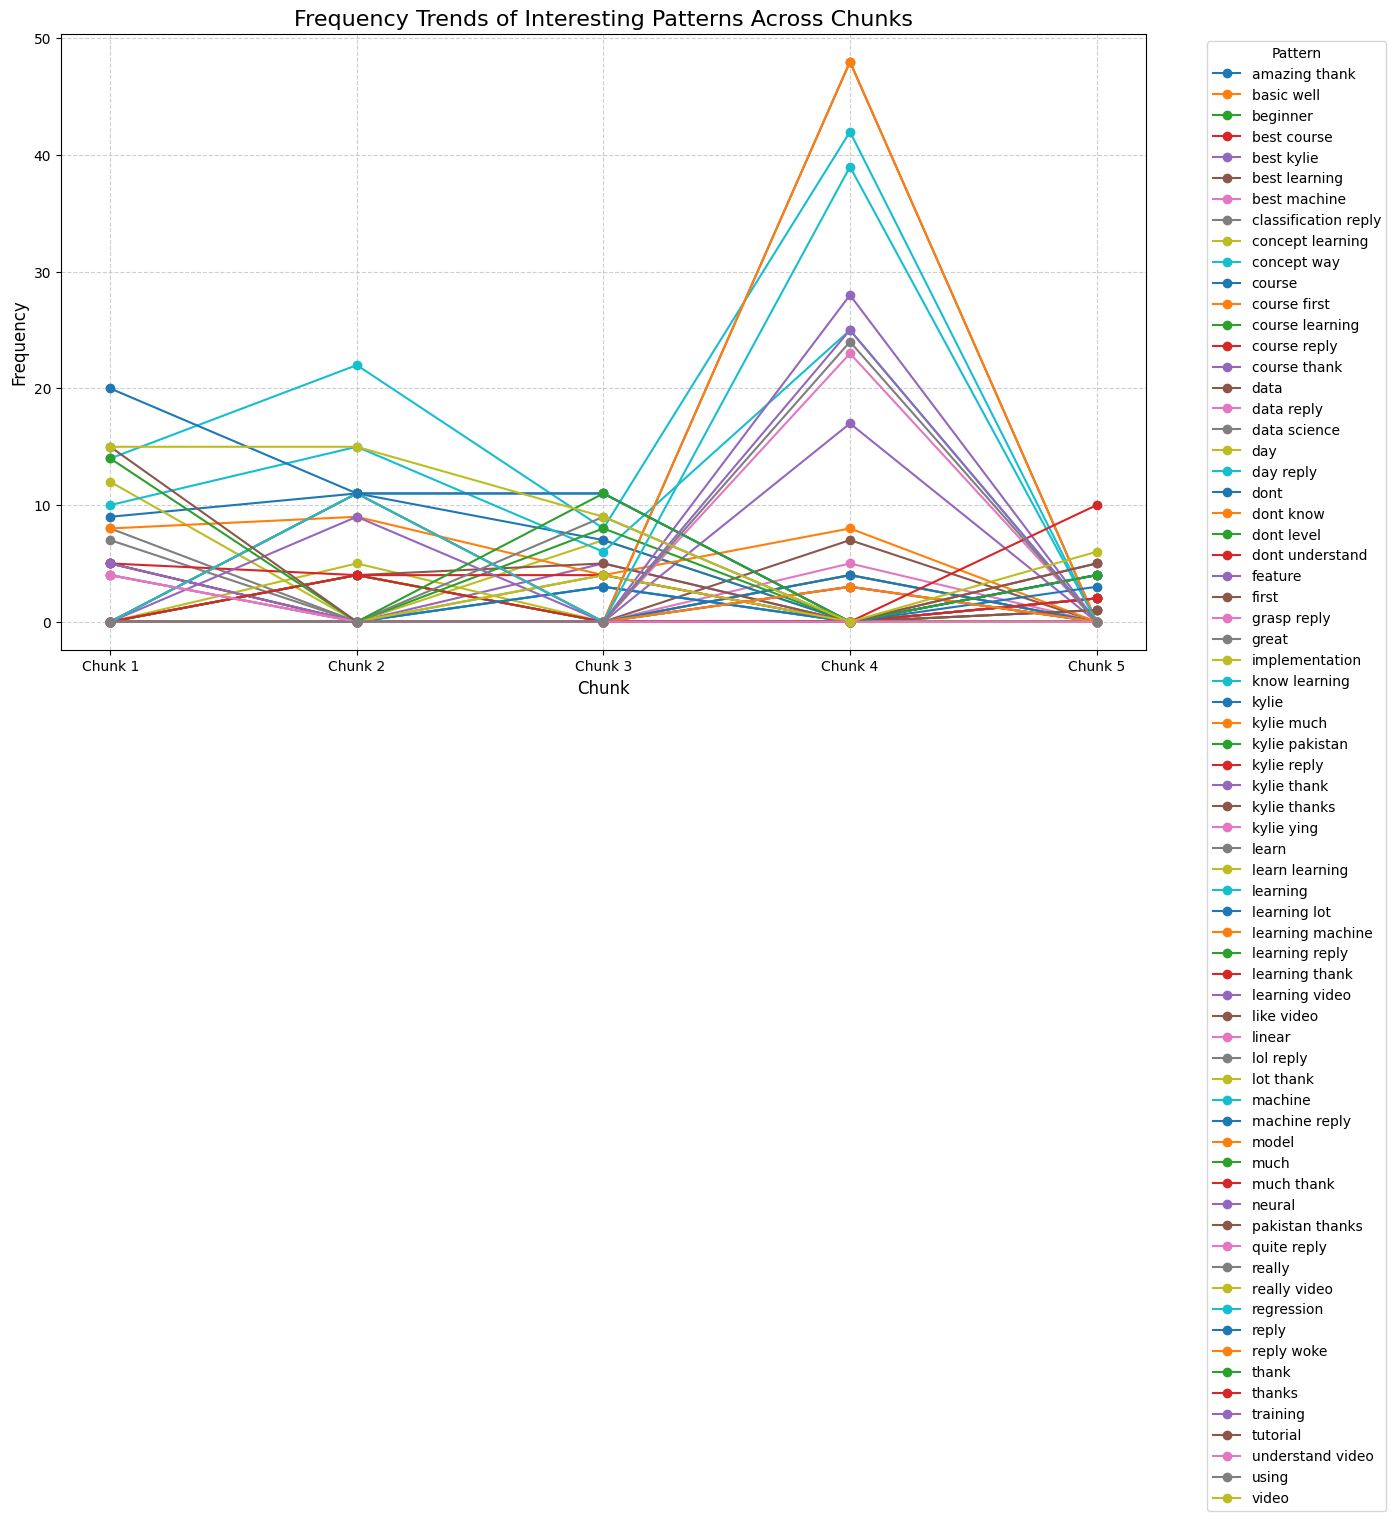

In [10]:
import matplotlib.pyplot as plt

# Plot each pattern's frequency over chunks
plt.figure(figsize=(14, 8))
for pattern in df_patterns.columns:
    plt.plot(df_patterns.index, df_patterns[pattern], marker='o', label=pattern)

plt.title("Frequency Trends of Interesting Patterns Across Chunks", fontsize=16)
plt.xlabel("Chunk", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Pattern", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Correlation Matrix:
            learning      data     model   machine  regression
learning    1.000000  0.932187  0.932187  0.995451    0.941026
data        0.932187  1.000000  1.000000  0.894123    0.998510
model       0.932187  1.000000  1.000000  0.894123    0.998510
machine     0.995451  0.894123  0.894123  1.000000    0.906085
regression  0.941026  0.998510  0.998510  0.906085    1.000000


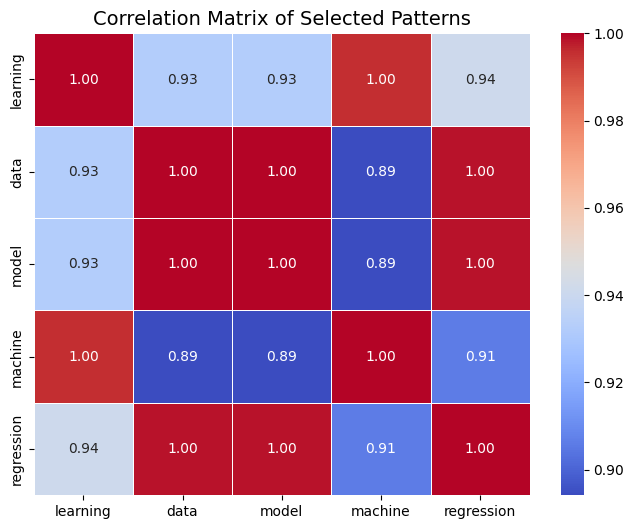

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df_selected.corr(method='pearson')

print("Correlation Matrix:")
print(corr_matrix)

# Visualize as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Selected Patterns", fontsize=14)
plt.show()
